## Text Analysis

In this notebook, I have scraped text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [192]:
import requests
import requests_cache
requests_cache.install_cache('coll_cache')
def fetch_page(url):
    response = requests.get(url)
    # Throw an error if status isn't 200 OK.
    response.raise_for_status()
    return response

In [227]:
import lxml.html as lx
import pandas as pd
#base="https://theaggie.org/campus/page/"
def urls(url,page=1):
    '''
    set the default number of page as 1 as instructed by the requirement.
    '''
    links=[]
    lists=[]
    for i in range(1,page+1):
        u=url+"page/"+str(i)+"/"
        page = fetch_page(u)
        html = lx.fromstring(page.text)
        li = html.xpath("//div/a")
        link=[x.attrib['href'] for x in li]
        links.append(link)
    for i in links:
        for j in i:
            lists.append(j)
    return lists


In [229]:
urls("https://theaggie.org/campus/")

['https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/',
 'https://theaggie.org/2017/02/23/university-of-california-davis-city-council-sever-wells-fargo-contracts/',
 'https://theaggie.org/2017/02/23/academics-unite-in-peaceful-rally-against-immigration-ban/',
 'https://theaggie.org/2017/02/23/memorial-union-to-reopen-spring-quarter/',
 'https://theaggie.org/2017/02/23/asucd-president-alex-lee-vetoes-amendment-for-creation-of-judicial-council/',
 'https://theaggie.org/2017/02/22/senate-candidate-zaki-shaheen-withdraws-from-race/',
 'https://theaggie.org/2017/02/21/uc-davis-experiences-several-recent-hate-based-crimes/',
 'https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/',
 'https://theaggie.org/2017/02/20/katehi-controversy-prompts-decline-of-uc-administrators-seeking-profitable-subsidiary-board-positions/',
 'https://theaggie.org/2017/02/20/asucd-senate-passes-resolution-submitting-comments-on-lrdp/',
 'https://theaggie.org/201

In [230]:
urls("https://theaggie.org/campus/",15)

['https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/',
 'https://theaggie.org/2017/02/23/university-of-california-davis-city-council-sever-wells-fargo-contracts/',
 'https://theaggie.org/2017/02/23/academics-unite-in-peaceful-rally-against-immigration-ban/',
 'https://theaggie.org/2017/02/23/memorial-union-to-reopen-spring-quarter/',
 'https://theaggie.org/2017/02/23/asucd-president-alex-lee-vetoes-amendment-for-creation-of-judicial-council/',
 'https://theaggie.org/2017/02/22/senate-candidate-zaki-shaheen-withdraws-from-race/',
 'https://theaggie.org/2017/02/21/uc-davis-experiences-several-recent-hate-based-crimes/',
 'https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/',
 'https://theaggie.org/2017/02/20/katehi-controversy-prompts-decline-of-uc-administrators-seeking-profitable-subsidiary-board-positions/',
 'https://theaggie.org/2017/02/20/asucd-senate-passes-resolution-submitting-comments-on-lrdp/',
 'https://theaggie.org/201

In [231]:
urls("https://theaggie.org/city/",15)

['https://theaggie.org/2017/02/23/davis-whole-foods-market-shuts-down/',
 'https://theaggie.org/2017/02/23/protest-against-planned-parenthood-in-woodland-is-met-with-counter-protests/',
 'https://theaggie.org/2017/02/23/daviss-historic-city-hall-building-to-be-put-up-for-sale/',
 'https://theaggie.org/2017/02/21/davis-stands-with-muslim-residents/',
 'https://theaggie.org/2017/02/20/city-of-davis-awarded-funds-for-new-recycling-bins/',
 'https://theaggie.org/2017/02/19/police-logs-12/',
 'https://theaggie.org/2017/02/16/city-of-davis-to-retain-sanctuary-city-status/',
 'https://theaggie.org/2017/02/15/suspect-in-davis-islamic-center-vandalism-arrested/',
 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/',
 'https://theaggie.org/2017/02/13/police-logs-11/',
 'https://theaggie.org/2017/02/12/news-in-brief-a-valentines-day-for-everybody/',
 'https://theaggie.org/2017/02/06/the-musical-train-to-memory-lane/',
 'https://theaggie.org/2017/02/05

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [232]:
def article(url):
    page = fetch_page(url)
    html = lx.fromstring(page.text)
    ti = html.xpath("//h1[@class = 'entry-title']")
    title=[x.text_content() for x in ti]
    title=''.join(title)
    te=html.xpath("//div[@itemprop = 'articleBody']/p")
    tex=[x.text_content() for x in te]
    text=' '.join(tex[:-2])
    if type(text)==unicode:
        text=text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    author=tex[-1]
    return ({"author": author, "text": text,"title":title,"url":url})


In [233]:
article('https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/')

{'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
 'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design.  Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager.  "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Tot

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [198]:
campus=urls("https://theaggie.org/campus/",4)
city=urls("https://theaggie.org/city/",4)
campusd=[]
cityd=[]
for i in campus:
    campusd.append(article(i))
for j in city:
    cityd.append(article(j))
campusdata=pd.DataFrame(campusd)
campusdata["category"]="campus"
citydata=pd.DataFrame(cityd)
citydata["category"]="city news"
frames = [campusdata,citydata]
result = pd.concat(frames)


In [199]:
result.head()

,author,text,title,url,category
0,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,campus
1,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,campus
2,Abedifard said Sadeghi’s speech resonated with...,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,campus
3,“As with any remodel project on a building tha...,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,campus
4,Written by: Ivan Valenzuela — campus@theaggie.org,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

I will plot a workcloud for both the city articles and campus articles.
sum over the similarity score divided by square root of the (the square root of the sum of the squares 

In [200]:
import numpy as np
import string
from nltk import corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from matplcotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')
%matplotlib inline

In [201]:
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    a=[]
    for i in text:
        a.append(stem(tokenize(i)))
    return a

At first, I lemmatize all the text and titles in the web pages for the further analysis. I have splitted into campus part and city part.

In [212]:
#campuslem contains all lemmas in the campus text.
campuslem=lemmatize(campusdata.text)
#citylem contains all lemmas in the city text.
citylem=lemmatize(citydata.text)
#campustlem contains all lemmas in the campus titles.
campustlem=lemmatize(campusdata.title)
#citytlem contains all lemmas in the city titles.
citytlem=lemmatize(citydata.title)
#lem contains all lemmas in all texts.
lem=campuslem+citylem
#titlelem contains all lemmas in all titles.
titlelem=campustlem+citytlem

In [203]:
exclude = set(string.punctuation)
def refine(string):
    '''
    this function is to remove the numbers and other confounding words or punctuations in the text
    most of the numbers appearing in the text are simply the dates or descriptive numbers
    which cannot reflect how similar the texts are.
    '''
    x=[]
    for letter in string:
        if not letter.isdigit():
            if letter not in stopwords.words('english'):
                if letter not in exclude:
                    if letter not in ["'s","``","''",u'\u2014']:
                        x.append(letter)
    return x 

Here I will only apply the refine algorithm to the text lemmas which are campuslem, citylem, and lem, since the titles are generally clean already.

In [216]:
for i in range(0,len(campuslem)):
    campuslem[i]=refine(campuslem[i])
for i in range(0,len(citylem)):
    citylem[i]=refine(citylem[i])
lem=campuslem+citylem
#Now we have the pure lemmas for all our text lemma files.

I have rejoin the splitted lemmas together to draw the wordcloud to see what topics are covered the most. I have defined a function called rejoin to rejoin the lemmas together.

In [205]:
f

There is another thing to mention about the way I decide the weight of each word. I have thought about which algorithm to use between simply counting the frequencies and using the tf-idf algorithm. The tf-idf score increases when the word appears in the text multiple times, and decreases when it appears in many of the texts. For finding the popular topics in a corpus, it is definitely good to place more weight when a word appears over and over again in the same text, but since the score will also decrease when the word appears in a lot of texts, the tf-idf algorithm is gonna be unfair for the words which appear in a lot of texts which should be considered popular. Therefore I have chosen to count the frequency of the words.

Lets first have a look on the overall topic, and I will draw the word cloud for both texts and titles to see which one is more informative.

In [224]:
def wcloud(lem):
    '''
    Since I have plotted several wordclouds, I have defined a function to return the wordcloud and dry my code.
    '''
    return WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      background_color="white",
                      max_words=1000,
                      max_font_size=40, random_state=42
                      ).generate(rejoin(lem))

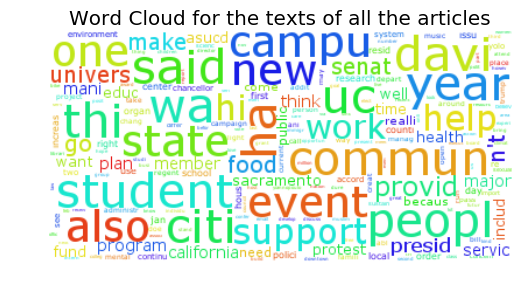

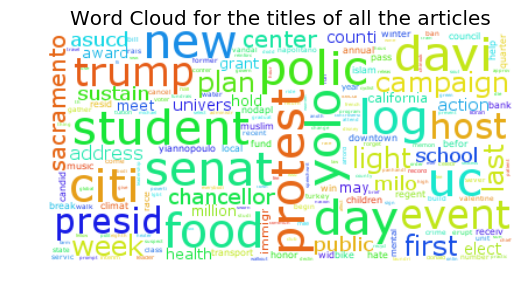

In [225]:
plt.figure(1)
plt.imshow(wcloud(lem))
plt.axis("off")
plt.title("Word Cloud for the texts of all the articles")
plt.show()

plt.figure(2)
plt.imshow(wcloud(titlelem))
plt.axis("off")
plt.title("Word Cloud for the titles of all the articles")
plt.show()

We can observe that the wordcloud of titles are definitely more informative than the one of texts. That's because although we already tried to eliminate the stop words and other confounding words, there are still a lot of redundant but meaningless words in the texts, such as 'said', 'people', 'work' and 'help'. These words appear a lot of times, but do not give us any valuable info about the topics of the articles. The wordcloud for titles is much clearer, since titles always include the condensed and summarized info on the whole texts. We can observe that 'protest', 'Trump', 'presid(ent)', 'food', 'senat', and 'polic(e)' have popular topics. Undoubtly the most popular topic is about politics, about President Trump and the potests inspired by his acts. The texts also contain other topics like food and climate, too.

Then we created 2 wordclouds for the titles of both campus and city articles to see the differences between the topics.

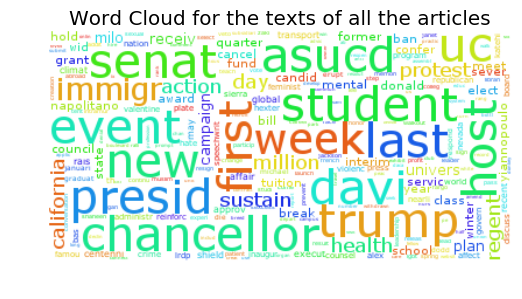

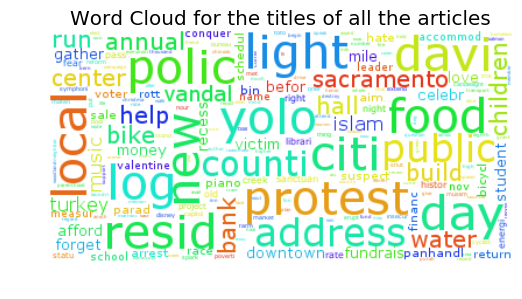

In [226]:
plt.figure(1)
plt.imshow(wcloud(campustlem))
plt.axis("off")
plt.title("Word Cloud for the texts of all the articles")
plt.show()

plt.figure(2)
plt.imshow(wcloud(citytlem))
plt.axis("off")
plt.title("Word Cloud for the titles of all the articles")
plt.show()

From the wordcloud for both the campus and city news articles, I think the city news aricles do cover more and wider topics than the campus news do. According to the word cloud of campus, we can observe that most of the popular topics are about the President Trump and his policy and Student issues, since the popular words are "President", "Trump", "senate", "immigration", "student", "event", and "chancellor". As for the city news articles, the topics are much wider. The popular topics cover "police", "light", "food", "protest", "water", "bank", "residence", including all kinds of social topics.

Then we can begin to find which articles are similar to each other. I have thought about the usage of text or titles on this problem, and I consider that there maybe too much randomality if we use titles since although they are pithy and summarized but too short. I decide to start with using the texts to see how it goes, and will stay with this way if I can find really similar articles, or I will think about merging the texts and titles.

One other thing to mention is that I have chosen to normalized the vectorized matrix, since when I first approach this problem, I have not used normalization, and it turns out that the most "similar" texts are the longest ones in the corpus, since without normalizing the data, the longer the texts, the higher score tend to be given. Therefore in the final version I have chosen to normalize.

In [208]:
vectorizer = TfidfVectorizer(smooth_idf=True,norm='l2')
tfs = vectorizer.fit_transform(a)

In [209]:
sim = tfs.dot(tfs.T)
#set the diagonals to be 0 since there is no meaning of compaing texts to themselves.
sim.setdiag(0)
c=sim.toarray()

In [210]:
from numpy import unravel_index
from numpy import argmax
sorted1=np.dstack(np.unravel_index(np.argsort(c.ravel()), (120, 120)))
#get the last 6 pairs of the sorted tuples.
sorted1[0][-6:]

array([[58, 51],
       [51, 58],
       [24, 38],
       [38, 24],
       [35, 14],
       [14, 35]])

Therefore we can observe that article 15(14+1) and 36 are the most similar ones, and the article 15 and 17 are the second most simlar, and the article 17 and article 56 are the third most similar. Let's begin with examine article 15 and 36.

In [174]:
print campusdata.text[14]

Conference entails full day of speakers, panels, student-led discussions UC Davis held its first mental health conference at the UC Davis Conference Center from 9 a.m. to 7:30 p.m. on Sunday Feb. 7. Over 150 students participated in a series of workshops, panel sets and activities.  After check-in and breakfast, opening remarks were given by Monica Porter, an attorney for the Disability Rights Advocates organization. Porter spoke briefly about her own experience with mental health and expressed her happiness at seeing many students participate in a mental health conference and speak openly about mental illness without fear of stigma.  The first workshop set offered students a choice between workshops about grief, minorities and mental health and an intersectional approach to healing and political activism during the Trump presidency. Anastasia Ruttkay, a fourth-year international relations major, attended the workshop which was aimed at ways to combat living in a Trump presidency.  "We

In [175]:
print campusdata.text[35]

Conference aims to destigmatize mental health, inspire students to engage in mental health work UC Davis will host its first ever mental health conference at the UC Davis Conference Center from 9 a.m. to 8 p.m. on Feb. 5. The UC Davis Mental Health Conference "aims to engage students in destigmatization and education efforts, prompt attendees to organize around mental health issues and offer them the opportunity for self-reflection and healing through mental health discourse," according to its event page. The idea to host a conference at UC Davis began after a delegation of 16 students were sent to UC Irvine for its mental health conference in May of 2016, using funds from the Division of Student Affairs. UC Irvine, UC Santa Barbara and UC Los Angeles already have mental health conferences. After the conference, Davis attendees of the Irvine conference approached ASUCD Senator Samantha Chiang, a third-year English and psychology double major, to help organize a conference at UC Davis. 

Through reading these 2 texts, we can observe that they are pretty similar to each other. Both of them are talking about the first mental health conference holding in UCD, including a lot of discussion on the mental health of people. I am pretty satisfied with this result since these 2 texts are definitely talking about the same thing.

In [176]:
print campusdata.text[24]

Regents approve tuition increase in 16-4 vote The Regents of the University of California (UC) met at UC San Francisco at Mission Bay on Jan. 25 and 26, approving the first tuition increase for the UC system in six years. Although other business items were discussed at the meeting, tuition dominated the discussion. ASUCD President Alex Lee was present at the meeting to provide a public comment.  "The reality is that these increases will not be moderate for us," Lee said. "The Middle Class Scholarship is on the chopping block in the proposed state budget [ ] Too many students already skip meals or don't buy necessary books to afford tuition or, even worse, may not be able to afford skyrocketing rents. We are facing a crisis of affordability." UC President Janet Napolitano, who was present at the meeting despite her recent hospitalization, explained that money for the UC must come from somewhere, but the state continues to not fully fund the system. "We have done more with less, but at a

In [177]:
print campusdata.text[38]

Tuition to increase by $336 On Thursday, Jan. 26, the UC Regents voted to raise the tuition for all of the 10 UC campuses. The 2017-18 tuition will increase by $282 and the student services fee will increase by $54 — a $336 increase overall. It will be the first tuition increase since 2010. "It was frustrating and disappointing to watch such a debate result in such a bad result, but I predict a worsening affordability crisis among UC students," said ASUCD President Alex Lee via email. "Officially [the UC Regents] claim 2/3 of students will not feel the increase because of increased financial aid, but that still leaves 1/3 (thousands of students!) who will feel the punch of $336 a year." UC Regent Gavin Newsom, who voted against the tuition increase, released a statement on Thursday after the vote.


Through reading these 2 texts, we can observe that they are also really similar to each other. Both of them are talking about the first tuition increase since 2010 in UCD, including how much the tuition rises and how people react to this increase. I am pretty satisfied with this result since these 2 texts are definitely talking about the same thing.

In [178]:
print campusdata.text[51]

Some activists in favor of Yiannopoulos, others accuse speaker of fascism On Jan. 13, the controversial ultra-conservative speaker Milo Yiannopoulos was to speak at UC Davis as part of his "The Dangerous Faggot Tour" with guest pharmaceutical executive Martin Shkreli. The event, hosted by the Davis College Republicans (DCR), was subsequently cancelled 30 minutes prior to Yiannopoulos taking the stage due to mass protests outside of the Sciences Lecture Hall venue. Prior to the 7 p.m. start time of the event, a crowd of hundreds gathered to protest it. Many wore black handkerchiefs as face masks and held signs suggesting that Yiannopoulos and his fans were fascist and promoting hate speech. The protesters also chanted sayings such as "No Milo, no KKK, no fascist USA," "Say it loud say it clear, racists are not welcome here" and "This is what democracy looks like." Eggs were thrown during the protest and an ABC News cameraman reportedly had hot coffee thrown at him.  According to Yiannop

In [179]:
print campusdata.text[58]

Yiannopoulos explains event's cancellation, marches with students, community members A protest was held at the Memorial Union (MU) on Jan. 14 in response to the cancellation of the Milo Yiannopoulos speaking event the night before. The Yiannopoulos event, which had faced backlash from the campus community, was cancelled about a half an hour before its start time due to hundreds of people protesting outside of the venue. "We will not stand for the regressive left perpetuating violence, censoring speech and spreading hate," read a Facebook post by the Davis College Republicans (DCR), the club that organized Yiannopoulos' visit. Yiannopoulos posted on his Facebook page about today's protest as well. "Come join us at 1 p.m. today in the Quad at UC Davis to protest the university's pathetic failure to protect free speech," he wrote a few hours before the protest. Over 100 people — a mixture of UC Davis students and community members — came to the protest. Several people attending came with 

Through reading these 2 texts, we can observe that they are definitely on the same topic. Both of them are talking about the protest against the Yiannopoulos' speech and the protest against the cancellation of the speech, including how people react to Yiannopoulos' planned speech in UCD and how his supporters think of the cancellation. I am pretty satisfied with this result since these 2 texts are definitely talking about the same thing.

To discuss about the last question, let us first have a look on the time span on our articles.

In [211]:
print(campusdata.url[0])
print(campusdata.url[59])
print(citydata.url[0])
print(citydata.url[59])

https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/
https://theaggie.org/2017/01/13/breaking-news-milo-yiannopoulos-event-cancelled/
https://theaggie.org/2017/02/23/davis-whole-foods-market-shuts-down/
https://theaggie.org/2016/11/14/construction-of-the-all-student-center-at-davis-high-begins/


We can observe that the timespan of the campus article is only about 40 days, and the timespan of the city articles is about 3 and a half months.

To be honest, I dont think this corpus is representative of the aggie articles, especially the campus news. From the wordcloud, we can observe that President Trump and his policies are one of the most popular topics in the news. It is obvious that this is a topic rising in the last several months but not a constant exising topic which is popular through years. The timeliness of news is important, and the topics of the news mainly depends on the big issues at that time. The short timespan of the articles, especially the campus news which only spans for 40 days, definitely limits the generality and representativeness of the article. If we want to dig deeper on representing the whole aggies news, we really should increase our sample size or use stratified sampling to pick for example 5 articles each month and combine them into our corpus.

The corpus does have some inference delivered to us. Firstly, it shows that President Trump and his policies are absolutely the most popular and rising topics for the last several months. Secondly, it supports that the city news do cover wider topics than the campus articles do according to our wordcloud. Thirdly, the news is highly depending on the hot issues and focus of the society, and it is hard for news in a specific period of time to represent other news which exist in a long timespan. 